In [1]:
from utils import copy_latest_csv

In [ ]:
# 考虑分析随着 batch size 变化, 调度器的 throughput 的变化
# 长的prefill, 长的decode, 高的rate(要确保达到计算极限，这样才会显出差别)
prompt_types = [
    {"type": "type1", "prefill": 50, "decode": 156, "arrival_rate": 1670},
    {"type": "type2", "prefill": 100, "decode": 171, "arrival_rate": 310},
]
num_requests = 10000

In [ ]:
# 首先测试 modified 在 limit = (100, 2200, 100) 的表现
# limit = 2300 的时候爆了

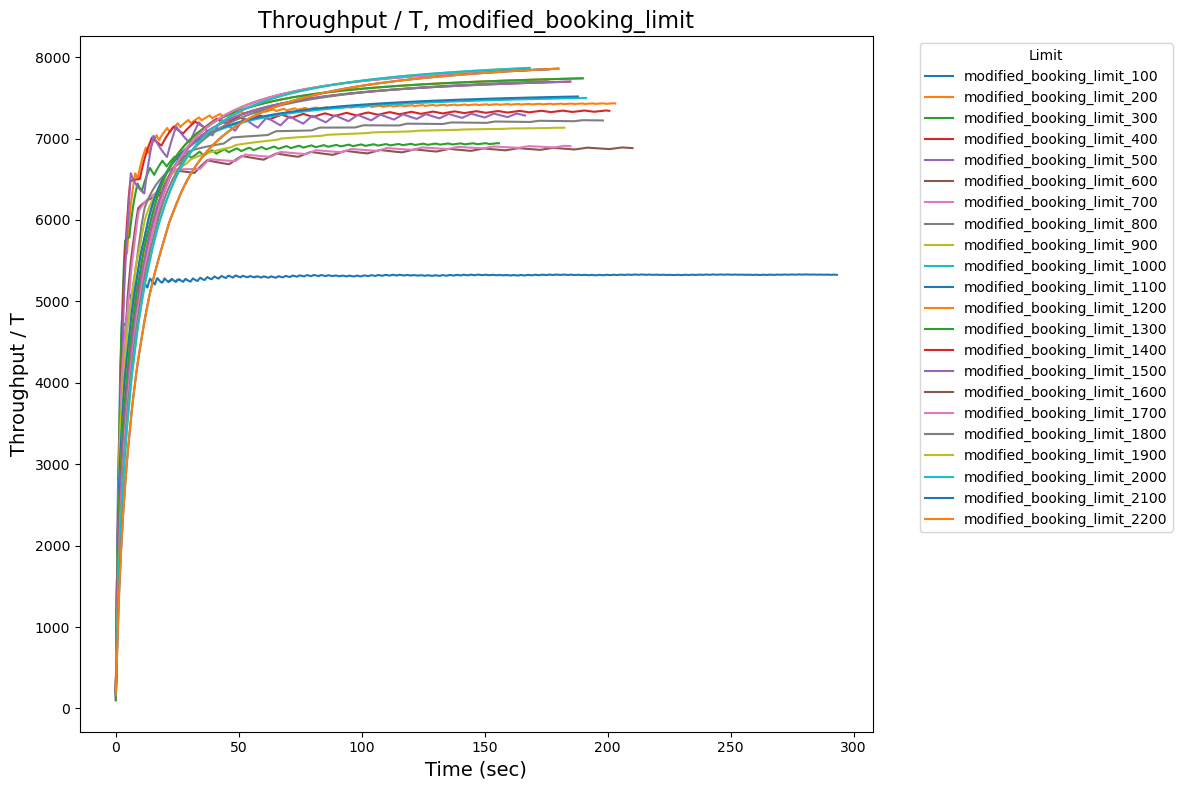

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定vllm文件夹的路径
vllm_folder = './modified_booking_limit'

# 获取vllm文件夹下所有符合条件的CSV文件
csv_files = [f for f in os.listdir(vllm_folder) if f.startswith('throughput_modified_booking_limit_limit_') and f.endswith('.csv')]

# 按照batch_size从小到大排序
csv_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个CSV文件
for file in csv_files:
    # 从文件名中提取batch_size
    batch_size = file.split('_')[-1].split('.')[0]
    
    # 使用pandas读取CSV文件
    file_path = os.path.join(vllm_folder, file)
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=f'modified_booking_limit_{batch_size}')

# 添加图例
plt.legend(title='Limit', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T, modified_booking_limit', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

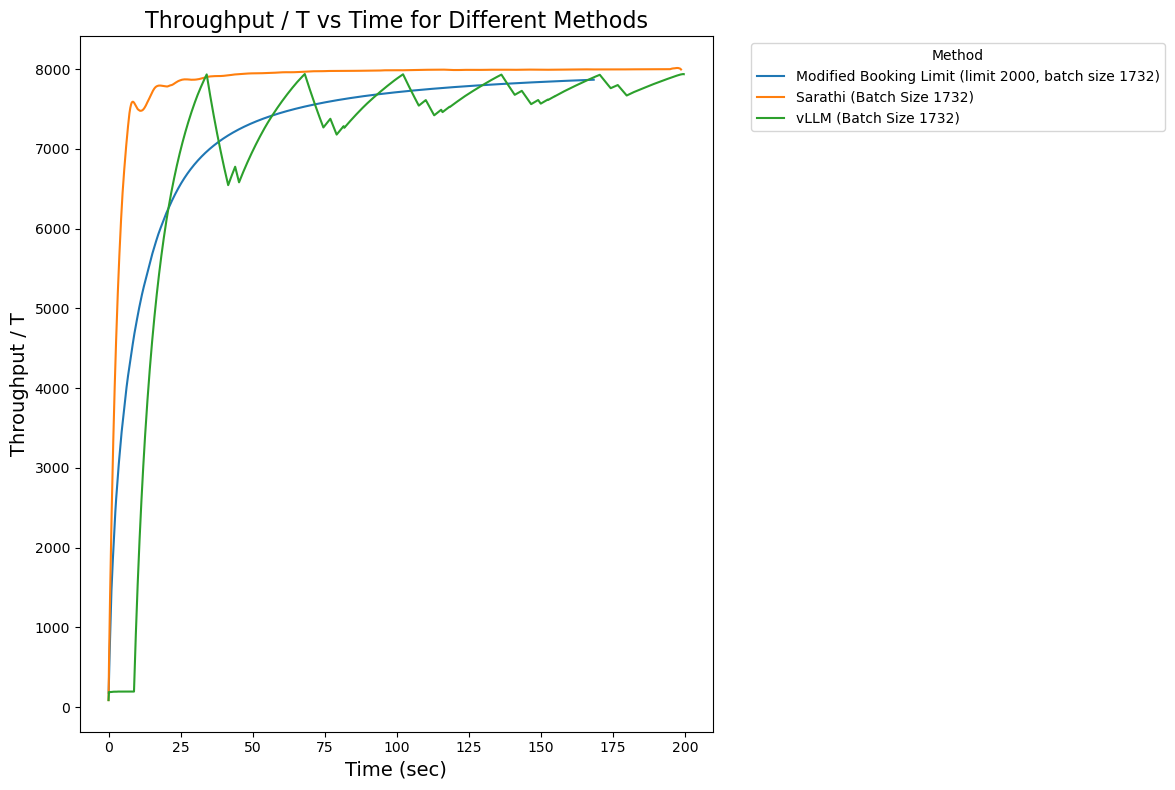

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径
file_paths = [
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/modified_booking_limit/throughput_modified_booking_limit_limit_2000.csv',
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/sarathi/throughput_sarathi_batch_size_1732.csv',
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/vllm/throughput_vllm_batch_size_1732.csv'
]

# 定义每条曲线的标签
labels = [
    'Modified Booking Limit (limit 2000, batch size 1732)',
    'Sarathi (Batch Size 1732)',
    'vLLM (Batch Size 1732)'
]

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个文件
for file_path, label in zip(file_paths, labels):
    # 使用pandas读取CSV文件
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=label)

# 添加图例
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T vs Time for Different Methods', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()

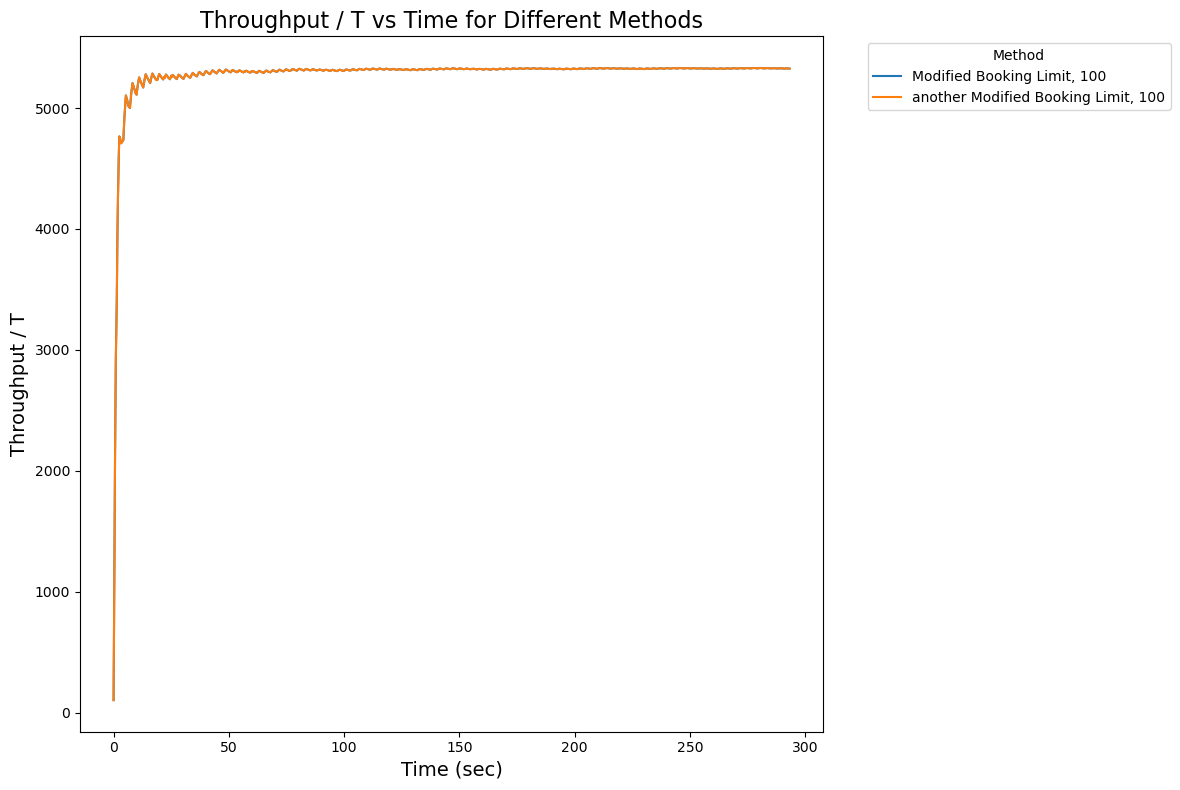

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径
file_paths = [
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/another_throughput_modified_booking_limit_100.csv',
    '/Users/luogan/Code/vidur_or/results_analysis/test10__long_decode_high_rate/modified_booking_limit/throughput_modified_booking_limit_limit_100.csv',
]

# 定义每条曲线的标签
labels = [
    'Modified Booking Limit, 100',
    'another Modified Booking Limit, 100',
]

# 创建一个新的图表
plt.figure(figsize=(12, 8))

# 遍历每个文件
for file_path, label in zip(file_paths, labels):
    # 使用pandas读取CSV文件
    df = pd.read_csv(file_path)
    
    # 计算 T时刻的throughput / T
    df['throughput_per_T'] = df['throughput'] / df['Time (sec)']
    
    # 绘制throughput_per_T随时间变化的曲线
    plt.plot(df['Time (sec)'], df['throughput_per_T'], label=label)

# 添加图例
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和标签
plt.title('Throughput / T vs Time for Different Methods', fontsize=16)
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / T', fontsize=14)

# 调整布局，防止图例遮挡
plt.tight_layout()

# 显示图表
plt.show()